In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
import pandas as pd
import numpy as np
# define dataset

df = pd.read_csv("nelson_data.csv")
pd.set_option("display.max_rows", None, "display.max_columns", None)  
print(df)

      HOMO    LUMO  BandGap  IonizationPotential  ElectronAffinity  \
0  -5.0281 -1.2038   3.8243               5.4946            0.8820   
1  -5.9310 -1.5959   4.3351               8.0970            1.2437   
2  -5.9541 -1.7279   4.2262               6.5248            1.3665   
3  -6.0807 -1.4955   4.5851               6.6003            1.1246   
4  -6.0910 -1.7097   4.3813               6.9285            1.3211   
5  -6.0339 -1.7881   4.2458               6.7491            1.4038   
6  -6.0077 -1.8618   4.1459               6.3343            1.5844   
7  -6.0483 -1.8090   4.2393               7.5607            1.4267   
8  -5.9683 -1.8400   4.1282               6.3006            1.5241   
9  -6.1196 -1.8520   4.2676               6.9963            1.4463   
10 -5.9726 -1.8610   4.1117               6.3000            1.5446   
11 -5.8428 -1.8311   4.0118               6.3635            1.4295   
12 -6.2622 -3.3737   2.8885               6.8184            2.9555   
13 -5.9373 -1.7981  

In [9]:
(size, features) =df.shape
features -= 1
df.shape

(41, 21)

In [10]:
def remodel(X, y, data):
    # define the base models
    level0 = list()
    level0.append(('knn', KNeighborsRegressor()))
    level0.append(('cart', DecisionTreeRegressor()))
    level0.append(('svm', SVR()))
    # define meta learner model
    level1 = LinearRegression()
    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    # fit the model on all available data
    model.fit(X.values, y.values)
    # make a prediction for one example

    yhat = model.predict(data)
    return yhat

X1, y1 = df.iloc[1:, :features], df.iloc[1:, features]
X, y = df.iloc[0:size-1, :features], df.iloc[0:size-1, features]
cols = 100
rows = size
predictions = np.zeros((rows, cols))
print('Processing, Please wait for a moment...')
#The program predicts 100 times and takes the average
for col in range(cols):
    data1 = [df.iloc[0, :features]]
    row=0
    position = [int(cols * row + col)] 
    np.put(predictions, position, remodel(X1, y1, data1))
    #print('Predicted Value at row 1: %.3f' % (predictions[row][col]))
    for row in range(size-2):
        j=row+2
        blockX1, blockY1 = df.iloc[0:j-1, :features], df.iloc[0:j-1, features]
        data2 = [df.iloc[j-1, :features]]
        blockX2, blockY2 = df.iloc[j:, :features], df.iloc[j:, features]

        tempX = [blockX1, blockX2]
        trainX = pd.concat(tempX)

        tempY = [blockY1, blockY2]
        trainY = pd.concat(tempY)
        
        position = [int(cols * (j-1) + col)] 
        np.put(predictions, position, remodel(trainX, trainY, data2))
        #print('Predicted Value at row %d: %.3f' % (j+1, predictions[j][col]))

    data = [df.iloc[size-1, :features]]
    position = [int(cols * (size-1) + col)] 
    np.put(predictions, position, remodel(X, y, data))
    #print('Predicted Value at row 41: %.3f' % (predictions[40][col]))
    
for t in range(rows):
    sumPredictions=0.0
    for l in range(cols):
        sumPredictions += predictions[t][l]
        #print('Predicted Value at row %d col %d: %.3f' % (t+1, l+1, predictions[t][l]))
    avgPrediction = sumPredictions/cols
    print('Average Predicted Value at row %d: %.3f' % (t+1, avgPrediction))

Processing, Please wait for a moment...
Average Predicted Value at row 1: 1.820
Average Predicted Value at row 2: 1.520
Average Predicted Value at row 3: 1.662
Average Predicted Value at row 4: 1.568
Average Predicted Value at row 5: 1.430
Average Predicted Value at row 6: 1.418
Average Predicted Value at row 7: 1.839
Average Predicted Value at row 8: 1.459
Average Predicted Value at row 9: 1.842
Average Predicted Value at row 10: 1.691
Average Predicted Value at row 11: 1.452
Average Predicted Value at row 12: 1.815
Average Predicted Value at row 13: 1.928
Average Predicted Value at row 14: 1.501
Average Predicted Value at row 15: 1.728
Average Predicted Value at row 16: 1.690
Average Predicted Value at row 17: 1.772
Average Predicted Value at row 18: 1.659
Average Predicted Value at row 19: 1.768
Average Predicted Value at row 20: 1.792
Average Predicted Value at row 21: 1.777
Average Predicted Value at row 22: 1.474
Average Predicted Value at row 23: 1.807
Average Predicted Value at

Processing, Please wait...
>knn rmse 0.227 (0.143)
>knn mae 0.197 (0.131)
>knn mape 0.131 (0.103)
>knn mse 0.072 (0.083)
>knn r2 1.502 (1.171)

>cart rmse 0.208 (0.157)
>cart mae 0.170 (0.124)
>cart mape 0.115 (0.098)
>cart mse 0.064 (0.089)
>cart r2 1.798 (2.681)

>svm rmse 0.255 (0.123)
>svm mae 0.228 (0.115)
>svm mape 0.154 (0.101)
>svm mse 0.080 (0.071)
>svm r2 0.868 (0.666)

>stacking rmse 0.215 (0.125)
>stacking mae 0.196 (0.114)
>stacking mape 0.128 (0.090)
>stacking mse 0.062 (0.064)
>stacking r2 1.017 (0.998)

BOX PLOTS


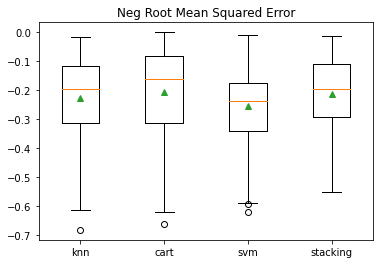

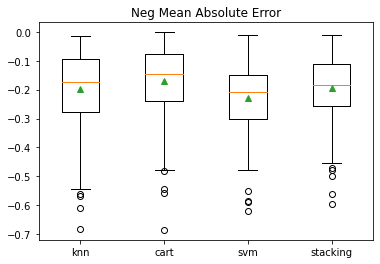

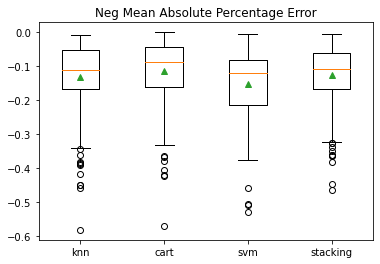

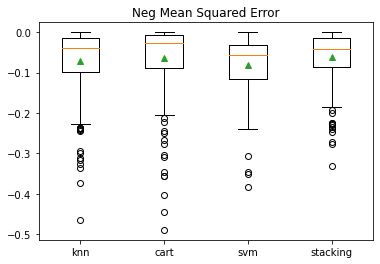

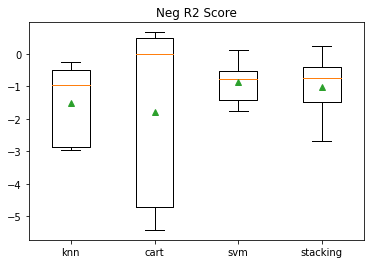

In [11]:
X, y = df.iloc[:, :features-1], df["CLASS"]
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import mean
from numpy import std
from matplotlib import pyplot
# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('knn', KNeighborsRegressor()))
	level0.append(('cart', DecisionTreeRegressor()))
	level0.append(('svm', SVR()))
	# define meta learner model
	level1 = LinearRegression()
	# define the stacking ensemble
	model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
	return model
 
# get a list of models to evaluate
def get_models():
	models = dict()
	models['knn'] = KNeighborsRegressor()
	models['cart'] = DecisionTreeRegressor()
	models['svm'] = SVR()
	models['stacking'] = get_stacking()
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    scores = dict()
    cv = RepeatedKFold(n_splits=20, n_repeats=10, random_state=1)
    scores['rmse'] = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score=5)
    scores['mae'] = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score=5)
    scores['mape'] = cross_val_score(model, X, y, scoring='neg_mean_absolute_percentage_error', cv=cv, n_jobs=-1, error_score=5)
    scores['mse'] = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score=5)
    scores['r2'] = cross_val_score(model, X, y, scoring='r2', cv=5, n_jobs=-1, error_score=5)
    return scores
 
# define dataset

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results1, results2, results3, results4, results5, names = list(), list(), list(),  list(), list(), list()
cols = 1
rows = 5
performance = np.zeros((rows, cols))
print('Processing, Please wait...')
for name, model in models.items():
    for col in range(cols):
        scores = evaluate_model(model, X, y)
        #results.append(scores)
        #names.append(name)
        position = [int(cols * 0 + col)] 
        np.put(performance, position, mean(scores['rmse']))
        position = [int(cols * 1 + col)] 
        np.put(performance, position, mean(scores['mae']))
        position = [int(cols * 2 + col)] 
        np.put(performance, position, mean(scores['mape']))
        position = [int(cols * 3 + col)] 
        np.put(performance, position, mean(scores['mse']))
        position = [int(cols * 4 + col)] 
        np.put(performance, position, mean(scores['r2']))
    rmse =0; mae=0; mape=0; mse=0; r2=0;
    for v in range(cols):
        rmse += performance[0][v];
        mae += performance[1][v];
        mape += performance[2][v];
        mse += performance[3][v];
        r2 += performance[4][v];
    print('>%s rmse %.3f (%.3f)' % (name, (-1 * rmse/cols), std(scores['rmse'])))
    print('>%s mae %.3f (%.3f)' % (name, (-1 * mae/cols), std(scores['mae'])))
    print('>%s mape %.3f (%.3f)' % (name, (-1 * mape/cols), std(scores['mape'])))
    print('>%s mse %.3f (%.3f)' % (name,(-1 * mse/cols), std(scores['mse'])))
    print('>%s r2 %.3f (%.3f)' % (name, (-1 * r2/cols), std(scores['r2'])))
    print()
    results1.append(scores['rmse'])
    results2.append(scores['mae'])
    results3.append(scores['mape'])
    results4.append(scores['mse'])
    results5.append(scores['r2'])
    names.append(name)
print('BOX PLOTS')
pyplot.boxplot(results1, labels=names, showmeans=True)
pyplot.title("Neg Root Mean Squared Error")
pyplot.show()
pyplot.boxplot(results2, labels=names, showmeans=True)
pyplot.title("Neg Mean Absolute Error")
pyplot.show()
pyplot.boxplot(results3, labels=names, showmeans=True)
pyplot.title("Neg Mean Absolute Percentage Error")
pyplot.show()
pyplot.boxplot(results4, labels=names, showmeans=True)
pyplot.title("Neg Mean Squared Error")
pyplot.show()
pyplot.boxplot(results5, labels=names, showmeans=True)
pyplot.title("Neg R2 Score")
pyplot.show()

In [13]:

def remodel(X, y, data):
    k = KNeighborsRegressor()
    k.fit(X.values, y.values)
    h = k.predict(data)
    return h

pd.set_option("display.max_rows", None, "display.max_columns", None)  
#print(df)


X1, y1 = df.iloc[1:, :features], df.iloc[1:, features]
X, y = df.iloc[0:size-1, :features], df.iloc[0:size-1, features]
cols = 100
rows = size
predictions = np.zeros((rows, cols))
print('Processing, Please wait for a moment...')
#The program predicts 100 times and takes the average
for col in range(cols):
    data1 = [df.iloc[0, :features]]
    row=0
    position = [int(cols * row + col)] 
    np.put(predictions, position, remodel(X1, y1, data1))
    #print('Predicted Value at row 1: %.3f' % (predictions[row][col]))
    for row in range(size-2):
        j=row+2
        blockX1, blockY1 = df.iloc[0:j-1, :features], df.iloc[0:j-1, features]
        data2 = [df.iloc[j-1, :features]]
        blockX2, blockY2 = df.iloc[j:, :features], df.iloc[j:, features]

        tempX = [blockX1, blockX2]
        trainX = pd.concat(tempX)

        tempY = [blockY1, blockY2]
        trainY = pd.concat(tempY)
        
        position = [int(cols * (j-1) + col)] 
        np.put(predictions, position, remodel(trainX, trainY, data2))
        #print('Predicted Value at row %d: %.3f' % (j+1, predictions[j][col]))

    data = [df.iloc[size-1, :features]]
    position = [int(cols * (size-1) + col)] 
    np.put(predictions, position, remodel(X, y, data))
    #print('Predicted Value at row 41: %.3f' % (predictions[40][col]))
    
for t in range(rows):
    sumPredictions=0.0
    for l in range(cols):
        sumPredictions += predictions[t][l]
        #print('Predicted Value at row %d col %d: %.3f' % (t+1, l+1, predictions[t][l]))
    avgPrediction = sumPredictions/cols
    print('Average Predicted Value at row %d: %.3f' % (t+1, avgPrediction))

Processing, Please wait for a moment...
Average Predicted Value at row 1: 1.457
Average Predicted Value at row 2: 1.296
Average Predicted Value at row 3: 1.364
Average Predicted Value at row 4: 1.396
Average Predicted Value at row 5: 1.201
Average Predicted Value at row 6: 1.221
Average Predicted Value at row 7: 1.685
Average Predicted Value at row 8: 1.299
Average Predicted Value at row 9: 1.530
Average Predicted Value at row 10: 1.332
Average Predicted Value at row 11: 1.519
Average Predicted Value at row 12: 1.428
Average Predicted Value at row 13: 1.908
Average Predicted Value at row 14: 1.307
Average Predicted Value at row 15: 1.870
Average Predicted Value at row 16: 1.275
Average Predicted Value at row 17: 1.459
Average Predicted Value at row 18: 1.512
Average Predicted Value at row 19: 1.772
Average Predicted Value at row 20: 1.329
Average Predicted Value at row 21: 1.825
Average Predicted Value at row 22: 1.276
Average Predicted Value at row 23: 1.893
Average Predicted Value at

In [14]:

def remodel(X, y, data):
    k = DecisionTreeRegressor()
    k.fit(X.values, y.values)
    h = k.predict(data)
    return h

pd.set_option("display.max_rows", None, "display.max_columns", None)  
#print(df)


X1, y1 = df.iloc[1:, :features], df.iloc[1:, features]
X, y = df.iloc[0:size-1, :features], df.iloc[0:size-1, features]
cols = 100
rows = size
predictions = np.zeros((rows, cols))
print('Processing, Please wait for a moment...')
#The program predicts 100 times and takes the average
for col in range(cols):
    data1 = [df.iloc[0, :features]]
    row=0
    position = [int(cols * row + col)] 
    np.put(predictions, position, remodel(X1, y1, data1))
    #print('Predicted Value at row 1: %.3f' % (predictions[row][col]))
    for row in range(size-2):
        j=row+2
        blockX1, blockY1 = df.iloc[0:j-1, :features], df.iloc[0:j-1, features]
        data2 = [df.iloc[j-1, :features]]
        blockX2, blockY2 = df.iloc[j:, :features], df.iloc[j:, features]

        tempX = [blockX1, blockX2]
        trainX = pd.concat(tempX)

        tempY = [blockY1, blockY2]
        trainY = pd.concat(tempY)
        
        position = [int(cols * (j-1) + col)] 
        np.put(predictions, position, remodel(trainX, trainY, data2))
        #print('Predicted Value at row %d: %.3f' % (j+1, predictions[j][col]))

    data = [df.iloc[size-1, :features]]
    position = [int(cols * (size-1) + col)] 
    np.put(predictions, position, remodel(X, y, data))
    #print('Predicted Value at row 41: %.3f' % (predictions[40][col]))
    
for t in range(rows):
    sumPredictions=0.0
    for l in range(cols):
        sumPredictions += predictions[t][l]
        #print('Predicted Value at row %d col %d: %.3f' % (t+1, l+1, predictions[t][l]))
    avgPrediction = sumPredictions/cols
    print('Average Predicted Value at row %d: %.3f' % (t+1, avgPrediction))

Processing, Please wait for a moment...
Average Predicted Value at row 1: 1.982
Average Predicted Value at row 2: 1.243
Average Predicted Value at row 3: 1.579
Average Predicted Value at row 4: 1.440
Average Predicted Value at row 5: 1.197
Average Predicted Value at row 6: 1.168
Average Predicted Value at row 7: 1.961
Average Predicted Value at row 8: 1.263
Average Predicted Value at row 9: 1.969
Average Predicted Value at row 10: 1.637
Average Predicted Value at row 11: 1.343
Average Predicted Value at row 12: 1.833
Average Predicted Value at row 13: 1.987
Average Predicted Value at row 14: 1.325
Average Predicted Value at row 15: 1.709
Average Predicted Value at row 16: 1.903
Average Predicted Value at row 17: 1.821
Average Predicted Value at row 18: 1.445
Average Predicted Value at row 19: 1.829
Average Predicted Value at row 20: 1.849
Average Predicted Value at row 21: 1.897
Average Predicted Value at row 22: 1.137
Average Predicted Value at row 23: 1.908
Average Predicted Value at

In [15]:

def remodel(X, y, data):
    k = LinearRegression()
    k.fit(X.values, y.values)
    h = k.predict(data)
    return h


X1, y1 = df.iloc[1:, :features], df.iloc[1:, features]
X, y = df.iloc[0:size-1, :features], df.iloc[0:size-1, features]
cols = 100
rows = size
predictions = np.zeros((rows, cols))
print('Processing, Please wait for a moment...')
#The program predicts 100 times and takes the average
for col in range(cols):
    data1 = [df.iloc[0, :features]]
    row=0
    position = [int(cols * row + col)] 
    np.put(predictions, position, remodel(X1, y1, data1))
    #print('Predicted Value at row 1: %.3f' % (predictions[row][col]))
    for row in range(size-2):
        j=row+2
        blockX1, blockY1 = df.iloc[0:j-1, :features], df.iloc[0:j-1, features]
        data2 = [df.iloc[j-1, :features]]
        blockX2, blockY2 = df.iloc[j:, :features], df.iloc[j:, features]

        tempX = [blockX1, blockX2]
        trainX = pd.concat(tempX)

        tempY = [blockY1, blockY2]
        trainY = pd.concat(tempY)
        
        position = [int(cols * (j-1) + col)] 
        np.put(predictions, position, remodel(trainX, trainY, data2))
        #print('Predicted Value at row %d: %.3f' % (j+1, predictions[j][col]))

    data = [df.iloc[size-1, :features]]
    position = [int(cols * (size-1) + col)] 
    np.put(predictions, position, remodel(X, y, data))
    #print('Predicted Value at row 41: %.3f' % (predictions[40][col]))
    
for t in range(rows):
    sumPredictions=0.0
    for l in range(cols):
        sumPredictions += predictions[t][l]
        #print('Predicted Value at row %d col %d: %.3f' % (t+1, l+1, predictions[t][l]))
    avgPrediction = sumPredictions/cols
    print('Average Predicted Value at row %d: %.3f' % (t+1, avgPrediction))

Processing, Please wait for a moment...
Average Predicted Value at row 1: 0.197
Average Predicted Value at row 2: 1.488
Average Predicted Value at row 3: 1.512
Average Predicted Value at row 4: 1.648
Average Predicted Value at row 5: 1.487
Average Predicted Value at row 6: 1.451
Average Predicted Value at row 7: 1.640
Average Predicted Value at row 8: 1.351
Average Predicted Value at row 9: 1.814
Average Predicted Value at row 10: 1.477
Average Predicted Value at row 11: 1.680
Average Predicted Value at row 12: 1.669
Average Predicted Value at row 13: 1.791
Average Predicted Value at row 14: 1.301
Average Predicted Value at row 15: 1.596
Average Predicted Value at row 16: 1.250
Average Predicted Value at row 17: 1.063
Average Predicted Value at row 18: 1.244
Average Predicted Value at row 19: 2.167
Average Predicted Value at row 20: 1.883
Average Predicted Value at row 21: 1.759
Average Predicted Value at row 22: 1.539
Average Predicted Value at row 23: 2.135
Average Predicted Value at

In [16]:
def remodel(X, y, data):
    k = SVR()
    k.fit(X.values, y.values)
    h = k.predict(data)
    return h


X1, y1 = df.iloc[1:, :features], df.iloc[1:, features]
X, y = df.iloc[0:size-1, :features], df.iloc[0:size-1, features]
cols = 100
rows = size
predictions = np.zeros((rows, cols))
print('Processing, Please wait for a moment...')
#The program predicts 100 times and takes the average
for col in range(cols):
    data1 = [df.iloc[0, :features]]
    row=0
    position = [int(cols * row + col)] 
    np.put(predictions, position, remodel(X1, y1, data1))
    #print('Predicted Value at row 1: %.3f' % (predictions[row][col]))
    for row in range(size-2):
        j=row+2
        blockX1, blockY1 = df.iloc[0:j-1, :features], df.iloc[0:j-1, features]
        data2 = [df.iloc[j-1, :features]]
        blockX2, blockY2 = df.iloc[j:, :features], df.iloc[j:, features]

        tempX = [blockX1, blockX2]
        trainX = pd.concat(tempX)

        tempY = [blockY1, blockY2]
        trainY = pd.concat(tempY)
        
        position = [int(cols * (j-1) + col)] 
        np.put(predictions, position, remodel(trainX, trainY, data2))
        #print('Predicted Value at row %d: %.3f' % (j+1, predictions[j][col]))

    data = [df.iloc[size-1, :features]]
    position = [int(cols * (size-1) + col)] 
    np.put(predictions, position, remodel(X, y, data))
    #print('Predicted Value at row 41: %.3f' % (predictions[40][col]))
    
for t in range(rows):
    sumPredictions=0.0
    for l in range(cols):
        sumPredictions += predictions[t][l]
        #print('Predicted Value at row %d col %d: %.3f' % (t+1, l+1, predictions[t][l]))
    avgPrediction = sumPredictions/cols
    print('Average Predicted Value at row %d: %.3f' % (t+1, avgPrediction))

Processing, Please wait for a moment...
Average Predicted Value at row 1: 1.777
Average Predicted Value at row 2: 1.324
Average Predicted Value at row 3: 1.555
Average Predicted Value at row 4: 1.565
Average Predicted Value at row 5: 1.341
Average Predicted Value at row 6: 1.318
Average Predicted Value at row 7: 1.869
Average Predicted Value at row 8: 1.387
Average Predicted Value at row 9: 1.877
Average Predicted Value at row 10: 1.494
Average Predicted Value at row 11: 1.817
Average Predicted Value at row 12: 1.567
Average Predicted Value at row 13: 1.858
Average Predicted Value at row 14: 1.494
Average Predicted Value at row 15: 1.810
Average Predicted Value at row 16: 1.385
Average Predicted Value at row 17: 1.926
Average Predicted Value at row 18: 1.576
Average Predicted Value at row 19: 1.877
Average Predicted Value at row 20: 1.618
Average Predicted Value at row 21: 1.779
Average Predicted Value at row 22: 1.443
Average Predicted Value at row 23: 1.871
Average Predicted Value at